## Case study

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

### Importing required libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
pd.set_option('display.max_columns', 200)

### Importing datasets

#### We are taking two dataframes:
- latest_apps which hold current application data 
- previous_apps which hold previous application data

In [4]:
latest_apps = pd.read_csv('application_data.csv')
previous_apps = pd.read_csv('previous_application.csv')

#### Checking the number of rows and columns in the dataframes


In [5]:
latest_apps.shape

(307511, 122)

In [6]:
previous_apps.shape

(1670214, 37)

#### Check the column-wise info of the dataframes for both the dataframes


In [7]:
latest_apps.info(verbose =True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [8]:
previous_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
# Observing top 5 entries of the latest_apps dataframe
latest_apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [10]:
# Observing top 5 entries of the previous_apps dataframe
previous_apps.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Check the summary for the numeric columns for both the dataframes

In [11]:
latest_apps.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [12]:
previous_apps.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Data Cleaning
- Performing operations to identify percentage of nullvalues in the latest_apps dataframe
- Dropping all the columns having missing value percentage greater than 50

#### Finding the missing data and missing data percentage in latest_apps dataframe

In [13]:
missing_data  = pd.DataFrame(columns=['Column','Type','Missing_count','Missing_percentage'])
for i in latest_apps.columns:
    null_count = latest_apps[i].isna().sum()
    null_perc  = null_count/len(latest_apps)*100
    if null_count != 0:
        df2={'Column':i
             ,'Type': latest_apps[i].dtype
             ,'Missing_count': null_count
             ,'Missing_percentage' : null_perc
            }
        missing_data = missing_data.append(df2,ignore_index=True)


In [14]:
# Sorting the missing data in descending order based on Missing percentage
missing_data.sort_values(by = 'Missing_percentage',ascending= False)

,Column,Type,Missing_count,Missing_percentage
41,COMMONAREA_MEDI,float64,214865,69.872297
13,COMMONAREA_AVG,float64,214865,69.872297
27,COMMONAREA_MODE,float64,214865,69.872297
49,NONLIVINGAPARTMENTS_MEDI,float64,213514,69.432963
35,NONLIVINGAPARTMENTS_MODE,float64,213514,69.432963
...,...,...,...,...
7,EXT_SOURCE_2,float64,660,0.214626
1,AMT_GOODS_PRICE,float64,278,0.090403
0,AMT_ANNUITY,float64,12,0.003902
5,CNT_FAM_MEMBERS,float64,2,0.000650


#### Dropping the columns from latest_apps having null values percentage greater than 50

In [15]:
for i in missing_data[missing_data.Missing_percentage>50].Column:
    latest_apps.drop(columns=i,axis =1,inplace=True)

In [16]:
# Checking the shape of the latest_apps dataframe after dropping columns
latest_apps.shape

(307511, 81)

In [17]:
# Checking the columns with missing percentage less than 15
missing_data[missing_data.Missing_percentage<15].sort_values(by ="Missing_percentage", ascending = False)

,Column,Type,Missing_count,Missing_percentage
61,AMT_REQ_CREDIT_BUREAU_HOUR,float64,41519,13.501631
62,AMT_REQ_CREDIT_BUREAU_DAY,float64,41519,13.501631
63,AMT_REQ_CREDIT_BUREAU_WEEK,float64,41519,13.501631
64,AMT_REQ_CREDIT_BUREAU_MON,float64,41519,13.501631
65,AMT_REQ_CREDIT_BUREAU_QRT,float64,41519,13.501631
66,AMT_REQ_CREDIT_BUREAU_YEAR,float64,41519,13.501631
2,NAME_TYPE_SUITE,object,1292,0.420148
56,OBS_30_CNT_SOCIAL_CIRCLE,float64,1021,0.332021
57,DEF_30_CNT_SOCIAL_CIRCLE,float64,1021,0.332021
58,OBS_60_CNT_SOCIAL_CIRCLE,float64,1021,0.332021


### Checking the variables with missing values  and  suggesting appropriate imputation method

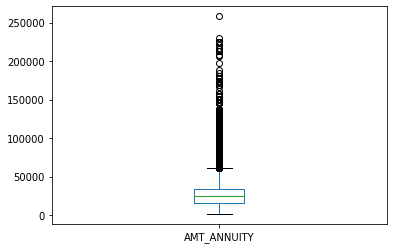

In [18]:
# Plotting a box plot for the column AMT_ANNUITY
latest_apps.AMT_ANNUITY.plot.box()
plt.show()

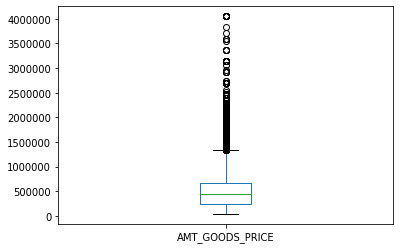

In [19]:
# Plotting a box plot for the column AMT_GOODS_PRICE
latest_apps.AMT_GOODS_PRICE.plot.box()
plt.show()

**Observation** : For the above two plots, for **AMT_GOODS_PRICE** and **AMT_ANNUITY**, we see that majority of the values are out of IQR. We can imply that for these columns extreme values impact the overall mean value. So here we choose to impute missing values with median instead of mean.

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


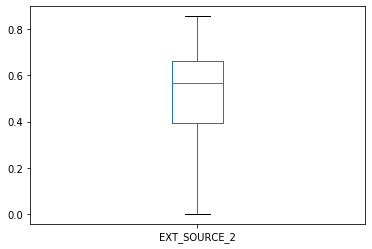

In [20]:
# Describing the EXT_SOURCE_2 column to check for mean & median. Later plotting box plot to check for outliers
print(latest_apps.EXT_SOURCE_2.describe())
latest_apps.EXT_SOURCE_2.plot.box()
plt.show()

**Observation** : For this variable  all the values lies within IQR.And we also see that mean and median are approximatly same. So here we can impute missing values with mean

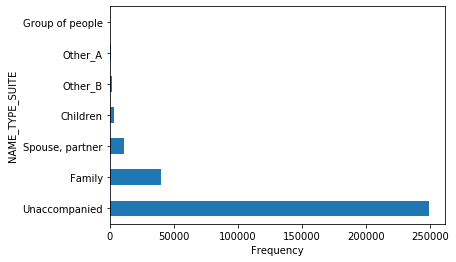

In [21]:
# Plotting a bar plot for the categorical variable NAME_TYPE_SUITE
latest_apps.NAME_TYPE_SUITE.value_counts().plot.barh()
plt.xlabel('Frequency')
plt.ylabel('NAME_TYPE_SUITE')
plt.show()

**Observation** : As this variable is a Categorical one, we can impute 0.42% of missing values with mode i.e. _Unaccompanied_

### Converting data types of the below mentioned columns from integer to object type
- columns 21-27
- columns 29-31
- columns 33-39
- columns 55-75

In [22]:
# converting dataypes of the columns mentioned above
latest_apps.iloc[:,21:27] = latest_apps.iloc[:,21:27].astype(object)
latest_apps.iloc[:,29:31] = latest_apps.iloc[:,29:31].astype(object)
latest_apps.iloc[:,33:39] = latest_apps.iloc[:,33:39].astype(object)
latest_apps.iloc[:,55:75] = latest_apps.iloc[:,55:75].astype(object)

In [23]:
#Verifying if the datatypes have updated for the columns
latest_apps.info(verbose =True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

#### Creating a new column AGE from DAYS_BIRTH as this could be more helpful in analysis than DAYS_BIRTH column as such 

In [24]:
latest_apps['AGE'] = latest_apps.DAYS_BIRTH//-365

### Outliers Detection

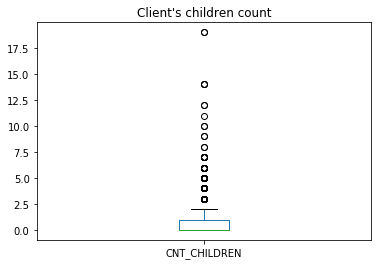

In [25]:
# Plotting a box plot to find outliers in CNT_CHILDREN column
latest_apps.CNT_CHILDREN.plot.box()
plt.title("Client's children count")
plt.show()

**Observation:** From this boxplot of number of children for the client, we can see that around 10 people are having children > 7. So these values can be considered as outliers.

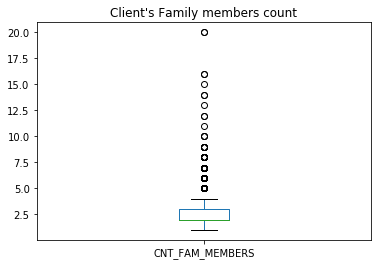

In [26]:
# Plotting graph for Number of family members of the client
latest_apps.CNT_FAM_MEMBERS.plot.box()
plt.title("Client's Family members count")
plt.show()

**Observation:** From this boxplot of Family members count of the client, we can see that around 20 people are having family members > 9. So these values can be concluded as outliers.

        AMT_INCOME_TOTAL
12840        117000000.0
203693        18000090.0
246858        13500000.0
77768          9000000.0
131127         6750000.0


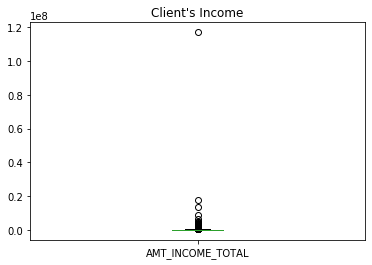

In [27]:
# Looking at the column to find out the top income value
print(latest_apps.sort_values(by='AMT_INCOME_TOTAL',ascending=False)[['AMT_INCOME_TOTAL']].head())

#Plotting AMT_INCOME_TOTAL
plt.title("Client's Income")
latest_apps.AMT_INCOME_TOTAL.plot.box()
plt.show()

**Observation:** By loooking into this boxplot, It is clear that there are few outliers, but 1 particular client is having salary 117000000 which is very high comparedt to next highest income(18000090.0)

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


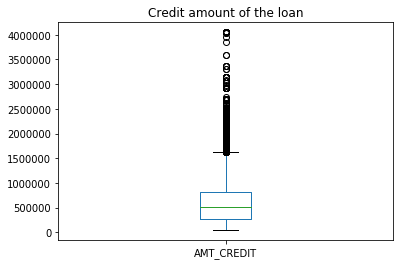

In [28]:
# Plotting the AMT_CREDIT column 
print(latest_apps.AMT_CREDIT.describe())
plt.title("Credit amount of the loan")
latest_apps.AMT_CREDIT.plot.box()
plt.show()

**Observation:** From the above graph, there are lot of outliers in the credit amount of the loan column.

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


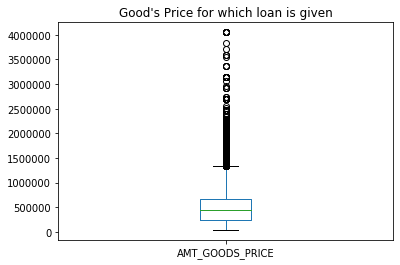

In [29]:
# Plotting box plot for AMT_GOODS_PRICE
print(latest_apps.AMT_GOODS_PRICE.describe())
plt.title("Good's Price for which loan is given")
latest_apps.AMT_GOODS_PRICE.plot.box()
plt.show()

**Observation:** For the above column the median is around 4.5 lakh and maximum value is around 40.5 lakh. THis variable has a many outliers.

### Binning

- Binning the AGE column on basis of the Age group of person. for eg A person of age 26 will be included in age group 20-30

In [30]:
latest_apps['AGE_GROUP'] = pd.cut(latest_apps.AGE,bins=[0,30,40,50,60,999],
                                       labels=['20-30','31-40','41-50','51-60','Above 60'])

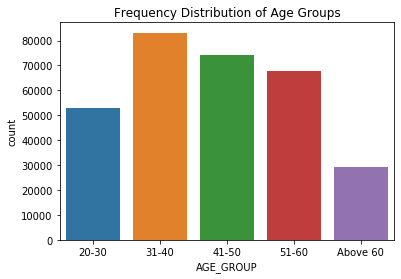

In [31]:
# Plotting a countplot to visualise the AGE_GROUP variable created by binning
sns.countplot(latest_apps['AGE_GROUP'])
plt.title('Frequency Distribution of Age Groups')
plt.show()

#### Categorizing the AMT_INCOME_TOTAL variable into 4 categories based on their income

In [32]:
latest_apps['AMT_INCOME_RANGE'] = pd.cut(latest_apps.AMT_INCOME_TOTAL,bins=[0,112500,147150,202500,117000000],
                                       labels=['Low','Medium','High','Very high'])

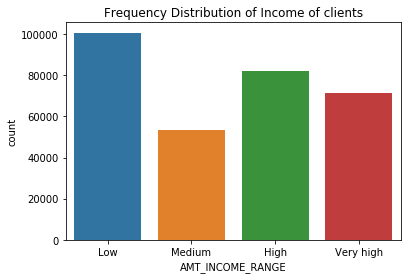

In [33]:
# Plotting a countplot to visualise the AMT_INCOME_RANGE variable created by binning
sns.countplot(latest_apps['AMT_INCOME_RANGE'])
plt.title('Frequency Distribution of Income of clients')
plt.show()

#### Checking inbalance in data

0    0.919271
1    0.080729
Name: TARGET, dtype: float64


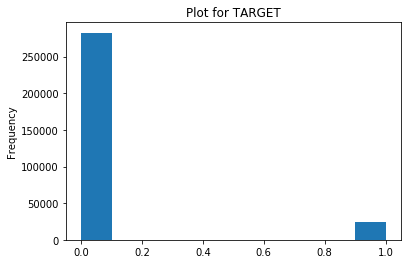

In [34]:
# checking value_counts for target column to find percentage
print(latest_apps.TARGET.value_counts(normalize=True))
plt.title("Plot for TARGET")
latest_apps.TARGET.plot.hist()
plt.show()

#### Observation from the chart

- The target varible has two categories. 1 - Client with payment difficulties &  0 - All other cases. From the above chart we can clearly see that there's a major imbalance between both the categories. 

- 8% people have had difficulties in repaying the loan while 92% people can be considered as majority of people repaying the loan without defaulting. 

#### Creating 2 dataframes 
- (i) target_1 if target variable is 1 - i.e client with payment difficulties 
- (ii)target_0 if target variable is 0 - all other cases

In [35]:
# Splitting dataframe based on TARGET value equal to 1
target_1 = latest_apps[latest_apps.TARGET == 1]

In [36]:
# Splitting dataframe based on TARGET value equal to 0
target_0 = latest_apps[latest_apps.TARGET == 0]

## Univariate Analysis

#### Univariate Analysis for Continuous Variable

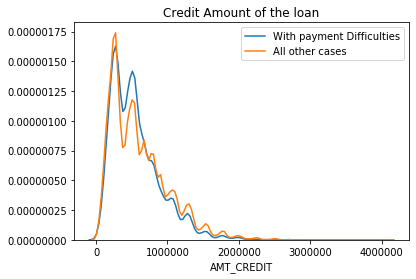

In [37]:
# Plotting the distribution plot for AMT_CREDIT in case of clients with payment issues and all other cases.
plt.title("Credit Amount of the loan")
sns.distplot(target_1.AMT_CREDIT,hist=False,label='With payment Difficulties')
sns.distplot(target_0.AMT_CREDIT,hist=False,label='All other cases')
plt.show()

**Observation:** Credit amount of the loan taken is almost having same trend in both the cases i.e facing payment difficulties and all other cases.

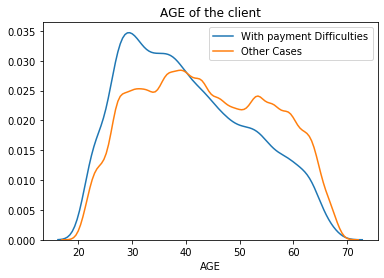

In [38]:
# Plotting the distribution plpt for AGE in case of clients with payment issues and all other cases.
plt.title("AGE of the client")
sns.distplot(target_1.AGE,hist=False,label='With payment Difficulties')
sns.distplot(target_0.AGE,hist=False,label='Other Cases')
plt.show()

**Observation:** From the above plot, we can infer the below points
- Clients under the age range 20-30 are likely to face payment issues more compared to other ages. 
- Clients having age>50 are likely not face payment issues.
- We can see that as age increases the tendency to face payment issues drops as shown by the plot.

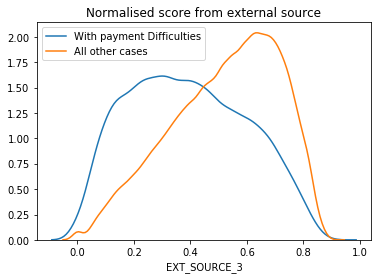

In [39]:
# Plotting the graph for External Source 3

plt.title("Normalised score from external source")
sns.distplot(target_1.EXT_SOURCE_3,hist=False,label='With payment Difficulties')
sns.distplot(target_0.EXT_SOURCE_3,hist=False,label='All other cases')
plt.show()

**Observations:** From the plot we can infer,
- for ext_source_3 values less than 0.45(approx) the possibility of client facing payment difficulties is more compared to other cases.
- for ext_source_3 values greater than 0.45(approx) the client is most probable of not facing payment difficulties.

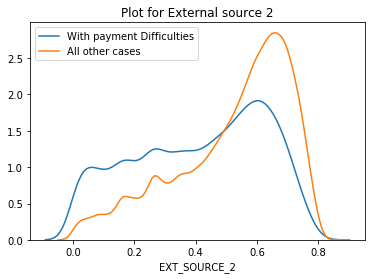

In [40]:
# Plotting the graph for Ext_SOURCE_2

plt.title("Plot for External source 2")
sns.distplot(target_1.EXT_SOURCE_2,hist=False,label='With payment Difficulties')
sns.distplot(target_0.EXT_SOURCE_2,hist=False,label='All other cases')
plt.show()

**Observation:** For this variable, 0-0.4 value has a trend of client facing payment difficulties more while value > approx 0.5 shows other cases are more.

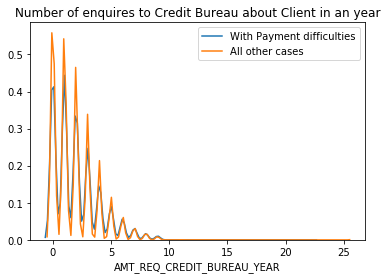

In [41]:
# Plotting distribution plot for AMT_REQ_CREDIT_BUREAU_YEAR

plt.title("Number of enquires to Credit Bureau about Client in an year")
sns.distplot(target_1.AMT_REQ_CREDIT_BUREAU_YEAR,hist=False,label='With Payment difficulties')
sns.distplot(target_0.AMT_REQ_CREDIT_BUREAU_YEAR,hist=False,label='All other cases')
plt.show()

**Observation:** This variable shows almost similar trend for both the cases.

#### Univariate Analysis for Categorical Variables


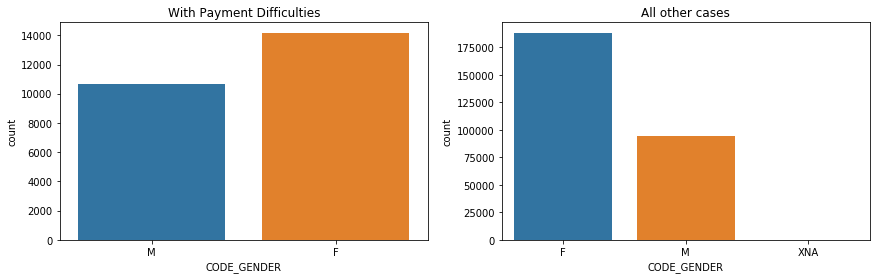

In [42]:
# Plotting graph for CODE_GENDER variable

plt.subplot(1,2,1)
sns.countplot(target_1.CODE_GENDER)
plt.title('With Payment Difficulties')

plt.subplot(1,2,2)
sns.countplot(target_0.CODE_GENDER)
plt.title('All other cases')

plt.subplots_adjust(right=2)
plt.show()

**Observation:** From the plots we can infer that females are dominating males in both the cases 

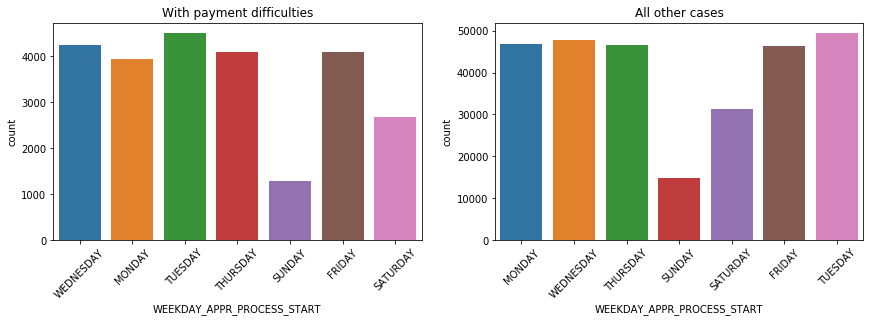

In [43]:
# Plotting graph for WEEKDAY_APPR_PROCESS_START variable

plt.subplot(1,2,1)
sns.countplot(target_1.WEEKDAY_APPR_PROCESS_START)
plt.title('With payment difficulties')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(target_0.WEEKDAY_APPR_PROCESS_START)
plt.title('All other cases')
plt.subplots_adjust(right=2)
plt.xticks(rotation=45)
plt.show()

**Observation:** From the charts we can see that the trend is same in both the cases

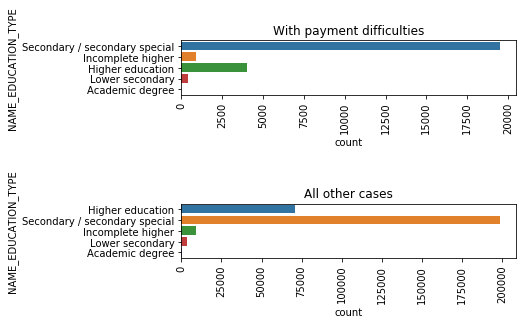

In [44]:
# Plotting NAME_EDUCATION_TYPE
plt.subplot(2,1,1)
sns.countplot(y = target_1.NAME_EDUCATION_TYPE)
plt.title('With payment difficulties')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.countplot(y = target_0.NAME_EDUCATION_TYPE)
plt.title('All other cases')
plt.subplots_adjust(hspace=2)
plt.xticks(rotation=90)
plt.show()

**Observation:** From the first chart we can infer that secondary/secondary special are majority who face payment difficulties compared to other categories.

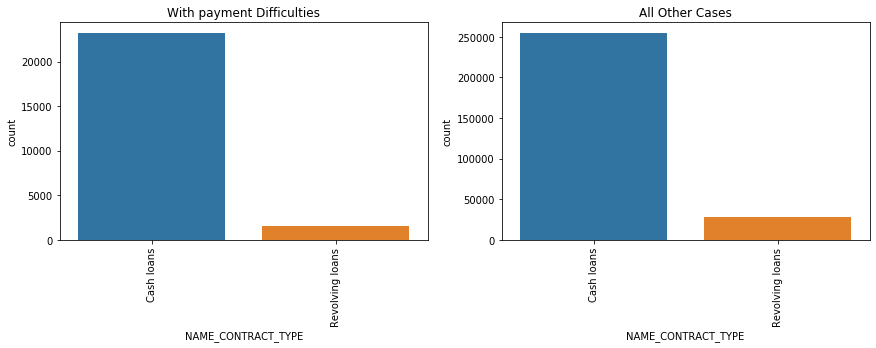

In [45]:
#plotting NAME_CONTRACT_TYPE
plt.subplot(1,2,1)
sns.countplot(target_1.NAME_CONTRACT_TYPE)
plt.title('With payment Difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(target_0.NAME_CONTRACT_TYPE)
plt.title('All Other Cases')
plt.subplots_adjust(right=2)
plt.xticks(rotation=90)
plt.show()

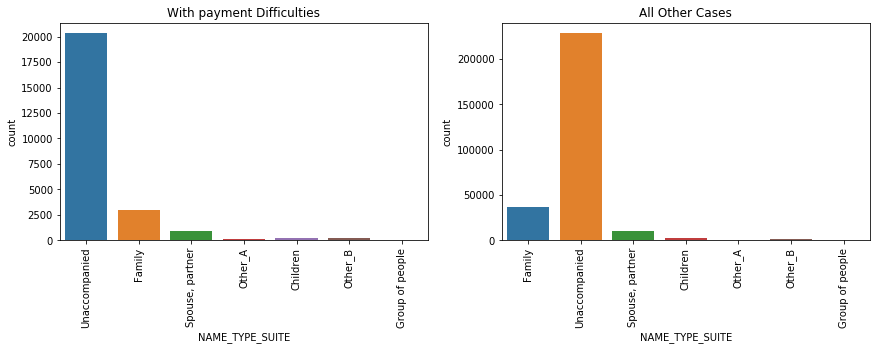

In [46]:
#plotting NAME_SUITE_TYPE
plt.subplot(1,2,1)
sns.countplot(target_1.NAME_TYPE_SUITE)
plt.title('With payment Difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(target_0.NAME_TYPE_SUITE)
plt.title('All Other Cases')
plt.subplots_adjust(right=2)
plt.xticks(rotation=90)
plt.show()

**Observation:** We cannot see any inference regarding target value from this column.

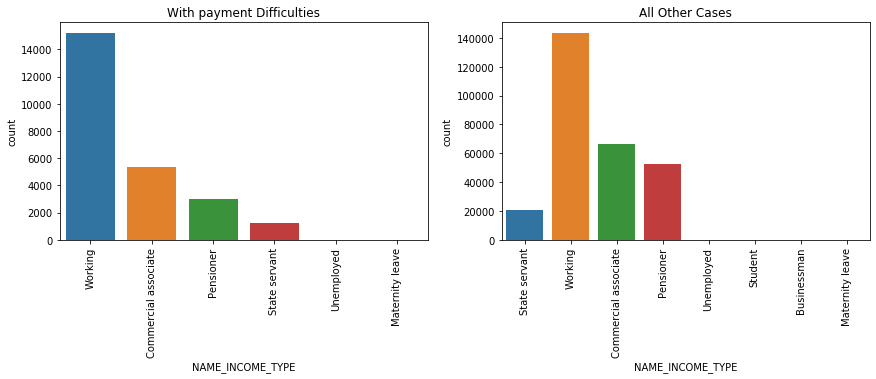

In [47]:
#Plotting NAME_INCOME_TYPE

plt.subplot(1,2,1)
sns.countplot(target_1.NAME_INCOME_TYPE)
plt.title('With payment Difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(target_0.NAME_INCOME_TYPE)
plt.title('All Other Cases')
plt.subplots_adjust(right=2)
plt.xticks(rotation=90)
plt.show()

**Observation:** Working people are dominating other categories followed by commercial associate in facing payment difficulties 

### Correlation among numerical variables for target_0 and target_1 dataframes

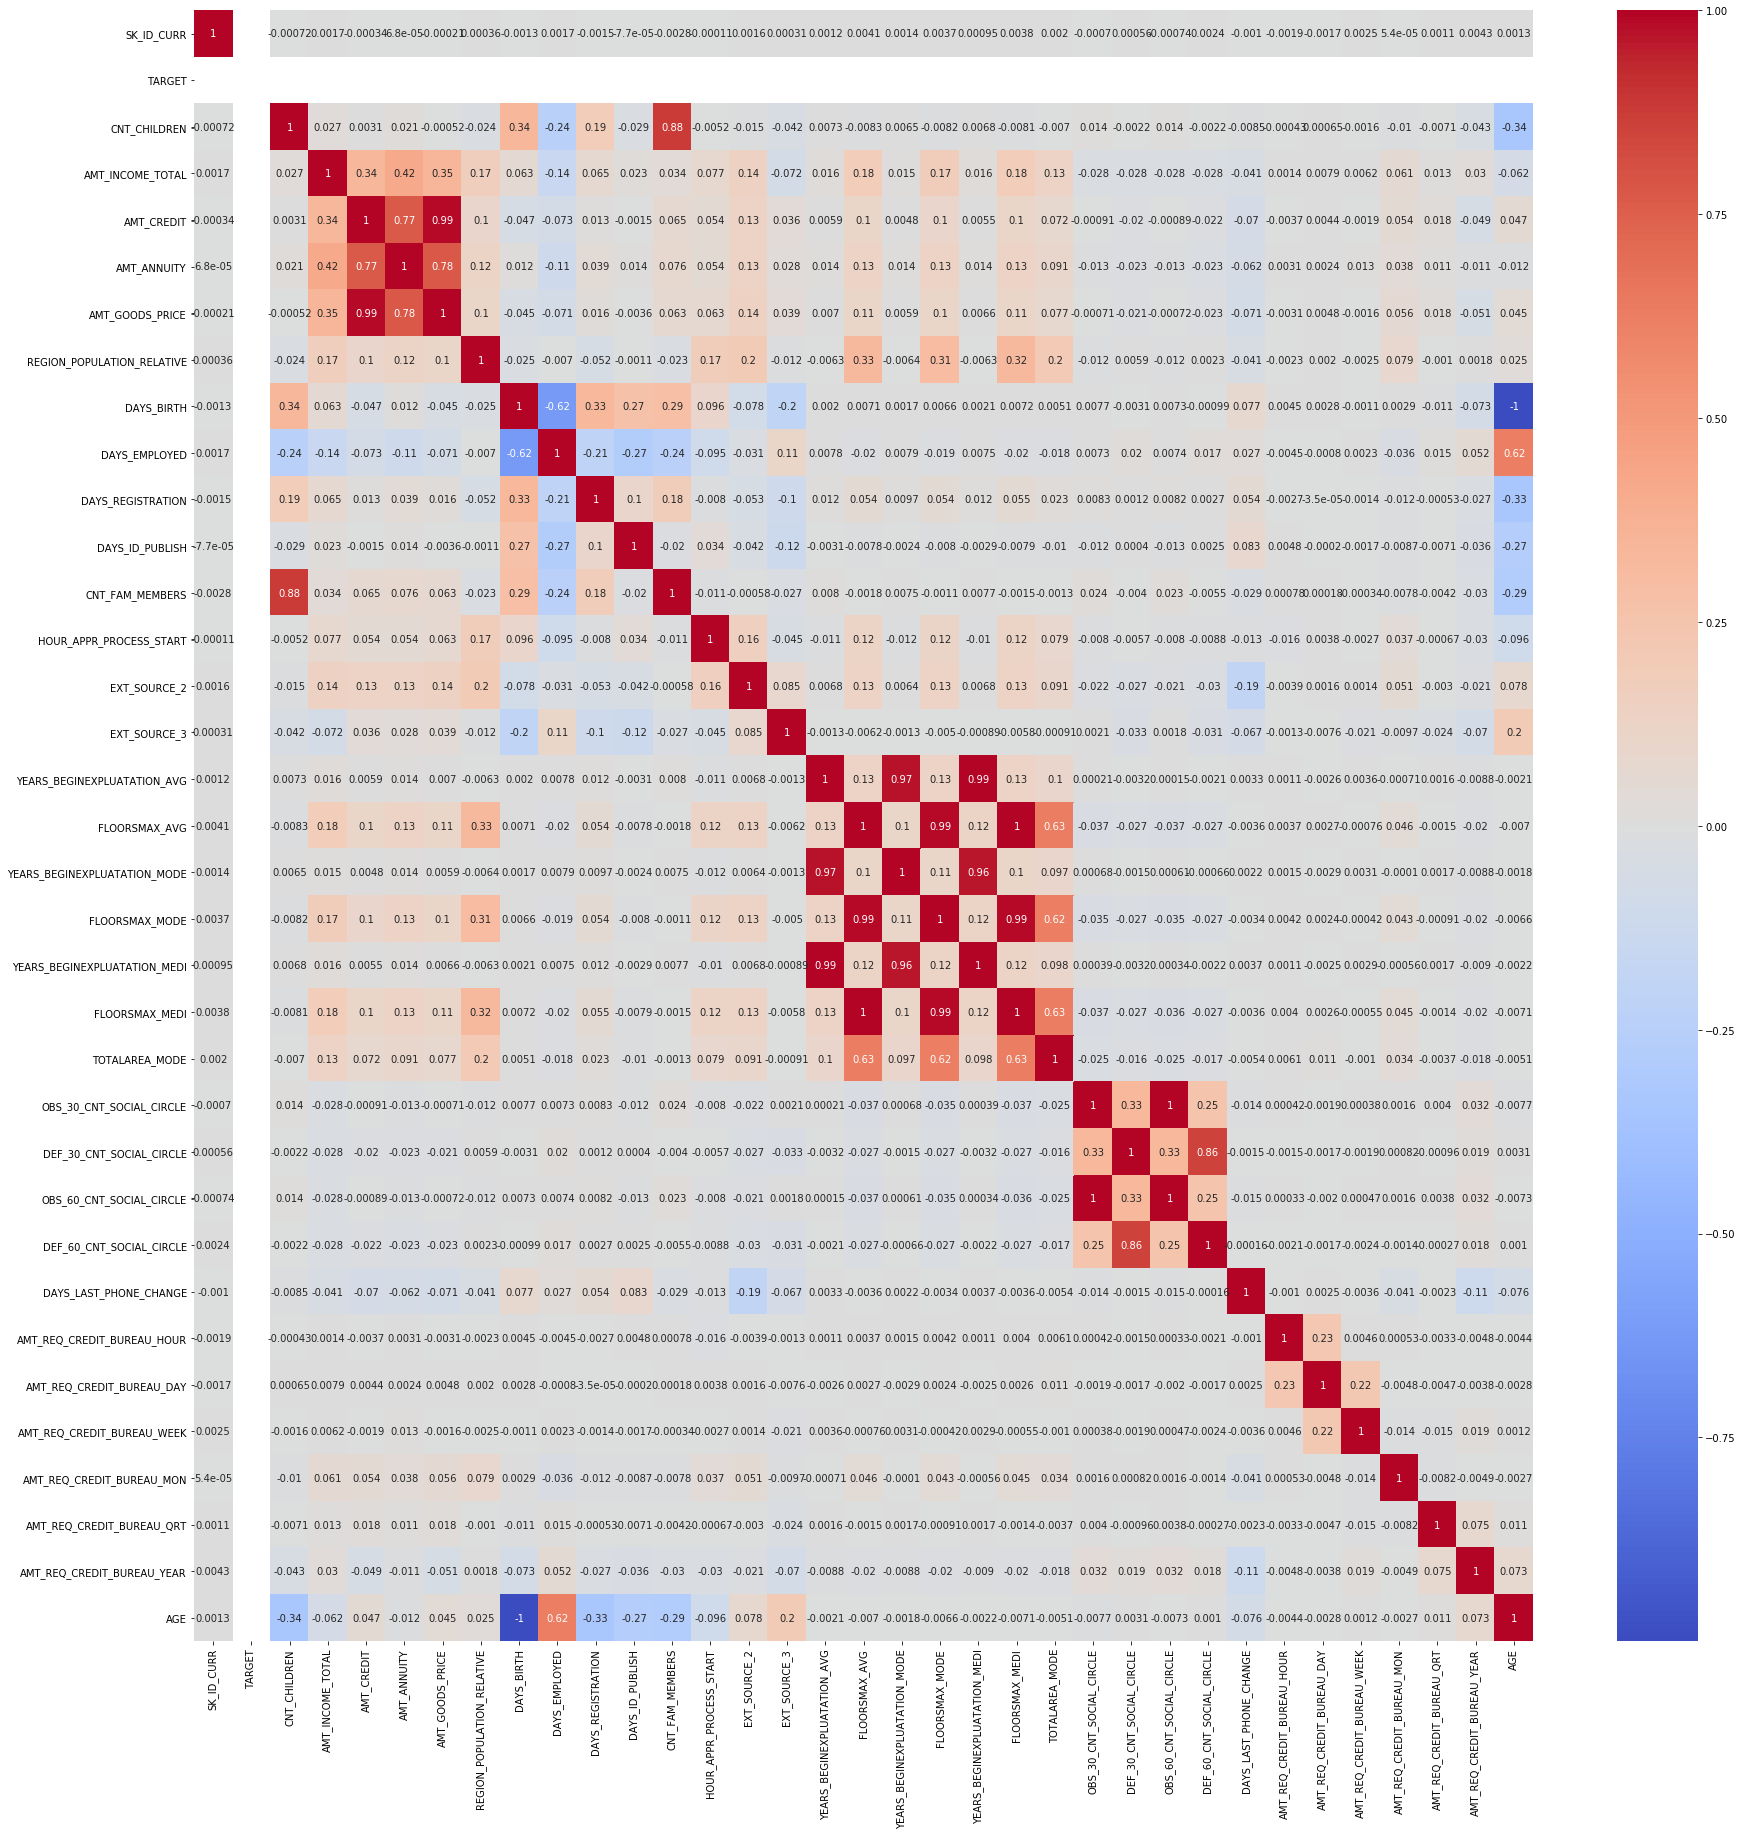

In [48]:
# Plotting a correlation heatmap for the target_1 dataframe
plt.figure(figsize=(30,30))
sns.heatmap(target_0.corr(),cmap='coolwarm',annot =True)
plt.show()

### Client having other issues
From the above heat map we can clearly see that 
#### Positively correlated pairs

- AMT_CREDIT and AMT_ANNUITY
- AMT_ANNUITY and AMT_GOODS_PRICE
- AMT_CREDIT   and AMT_GOODS_PRICE
- AMT_INCOME_TOTAL cloumn is highly correlated with columns AMT_CREDIT , AMT_ANNUITY , AMT_GOODS_PRICE
- CNT_CHILDREN and  CNT_FAM_MEMBERS
- 3 columns YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE, YEARS_BEGINEXPLUATATION_MEDI are highly correlated
- 3 columns FLOORSMAX_AVG,FLOORSMAX_MODE ,FLOORSMAX_MEDI are highly correlated
- _(From above 2 correlation we can say that data in Floorsnax and YEARS_BEGINEXPLUATATION is normalized as mean median and mode are highly correlated)_
- TOTALAREA_MODE cloumn is highly correlated with columns  FLOORSMAX_AVG,FLOORSMAX_MODE ,FLOORSMAX_MEDI
- OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE

#### Negativily correlated pairs

- DAYS_BIRTH  and  DAYS_EMPLOYED
- DAYS_BIRTH   and AGE
- _(As Age is derived from Birth column these 2 are very highly negatively correlated)_


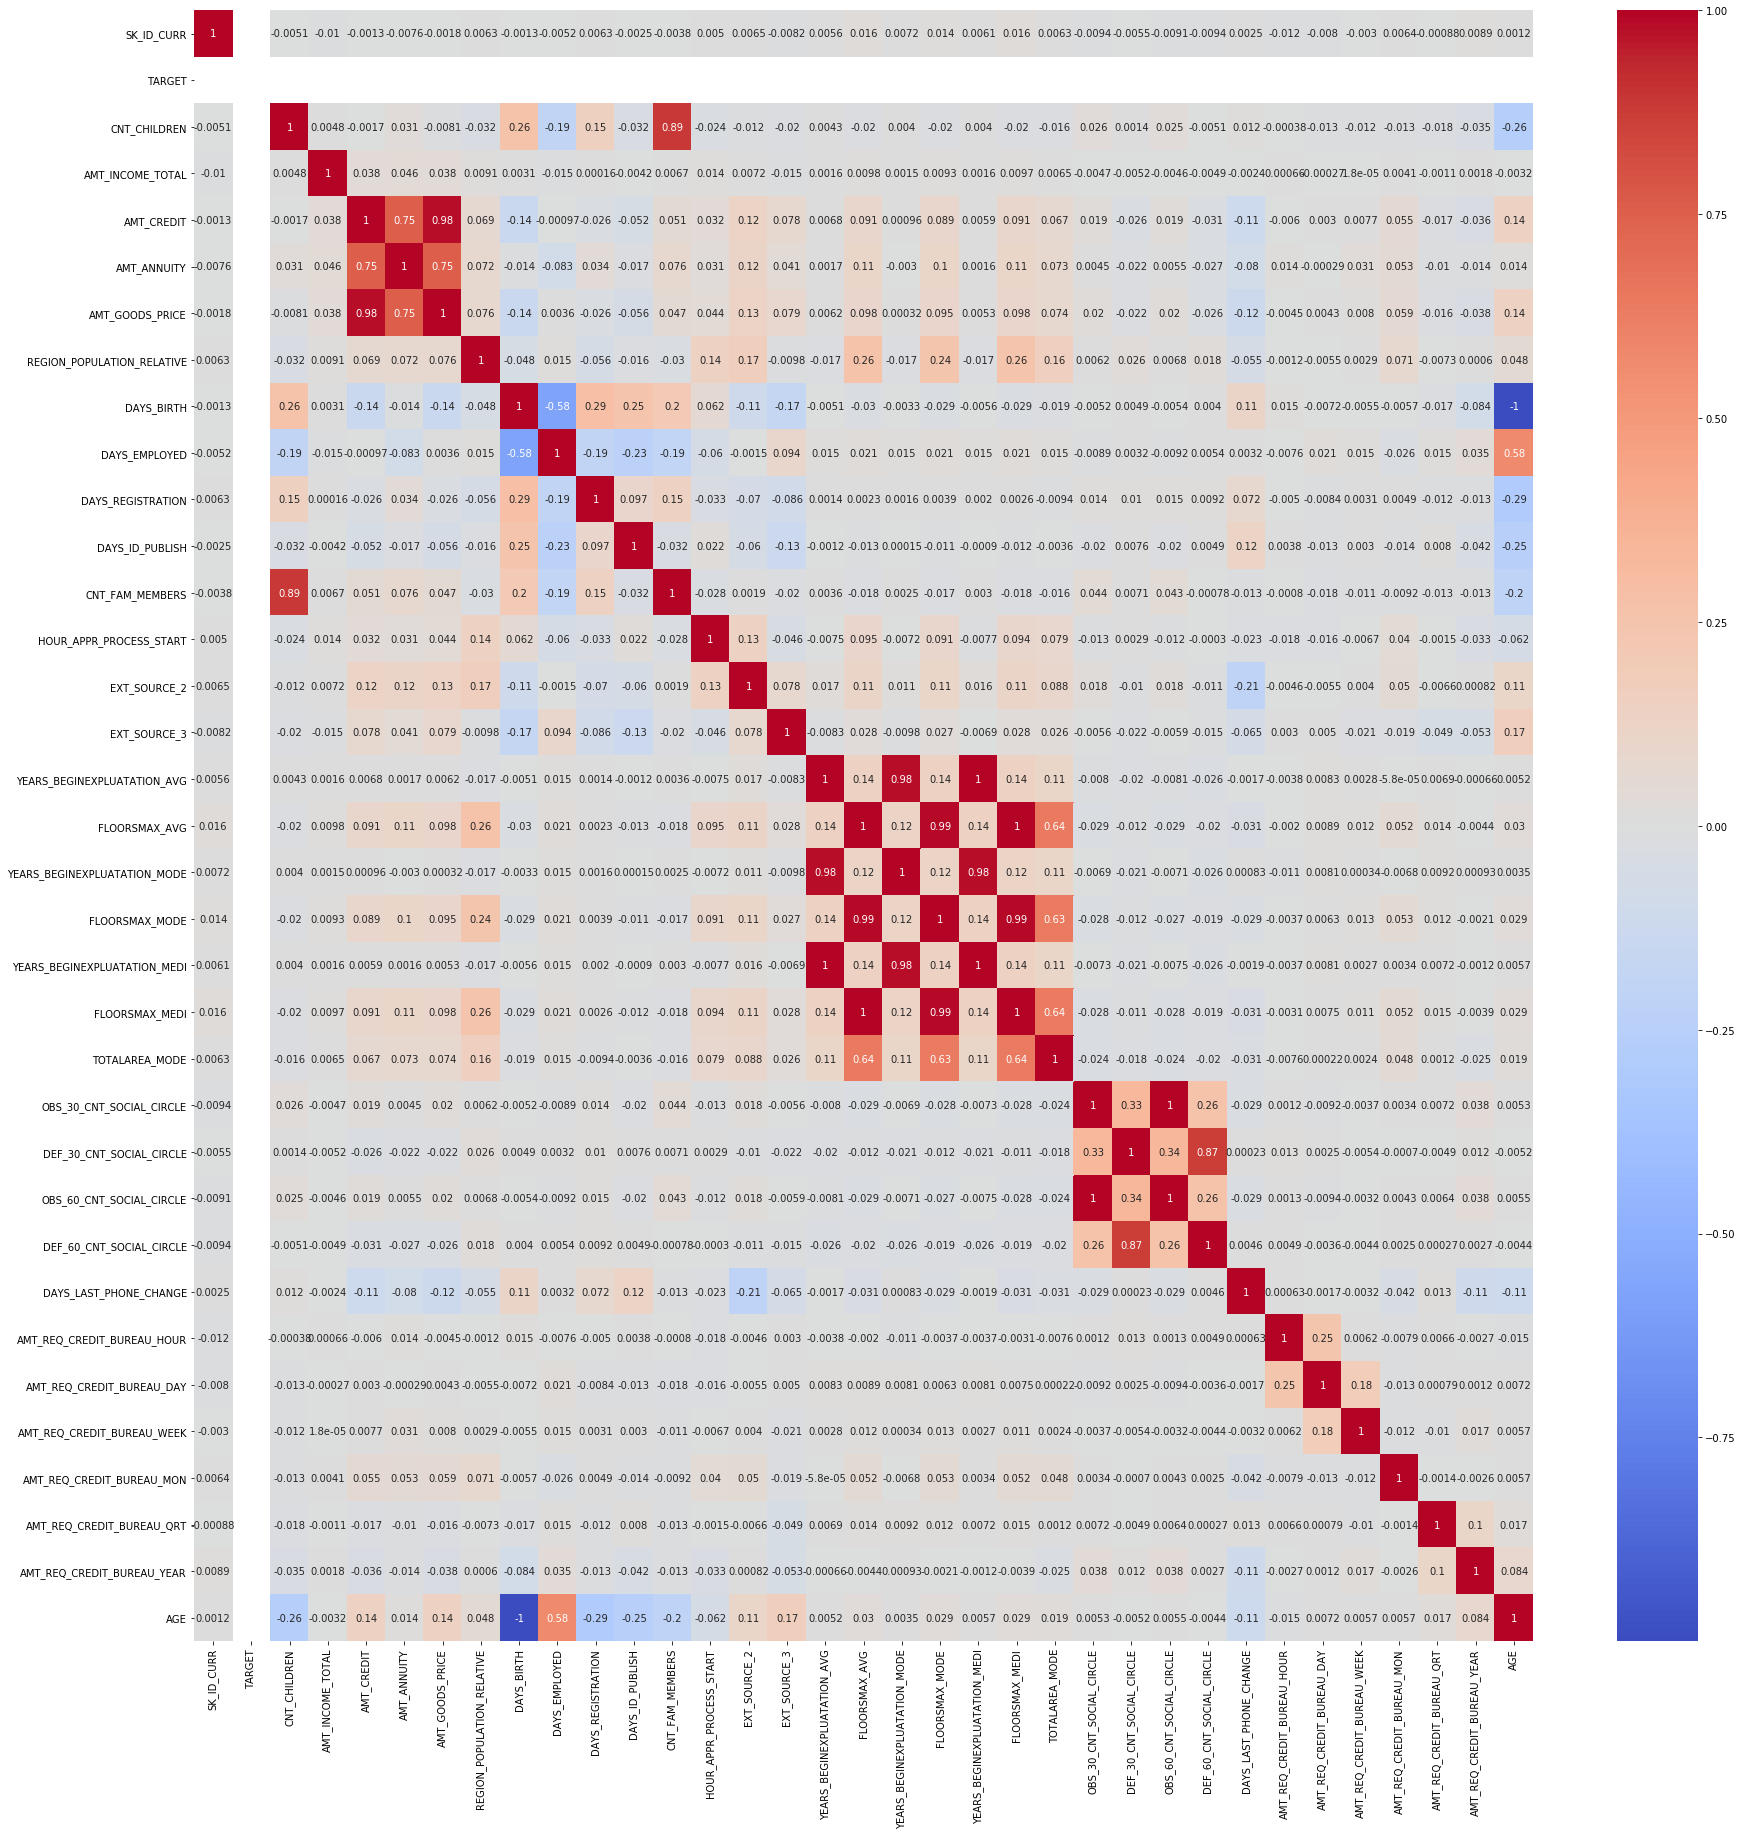

In [49]:
# Plotting correlation heatmap for target_0 dataframe
plt.figure(figsize=(30,30))
sns.heatmap(target_1.corr(),cmap='coolwarm',annot =True)
plt.show()

### Client facing payment issues
From the above heat map we can clearly see that 
#### Positively correlated pairs

- AMT_CREDIT and AMT_ANNUITY
- AMT_ANNUITY and AMT_GOODS_PRICE
- AMT_CREDIT   and AMT_GOODS_PRICE
- CNT_CHILDREN and  CNT_FAM_MEMBERS
- 3 columns YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE, YEARS_BEGINEXPLUATATION_MEDI are highly correlated
- 3 columns FLOORSMAX_AVG,FLOORSMAX_MODE ,FLOORSMAX_MEDI are highly correlated
- _(From above 2 correlation we can say that data in Floorsnax and YEARS_BEGINEXPLUATATION is normalized as mean median and mode are highly correlated)_
- TOTALAREA_MODE cloumn is highly correlated with columns  FLOORSMAX_AVG,FLOORSMAX_MODE ,FLOORSMAX_MEDI
- OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE

#### Negativily correlated pairs

- DAYS_BIRTH  and  DAYS_EMPLOYED
- DAYS_BIRTH   and AGE
- _(As Age is derived from Birth column these 2 are very highly negatively correlated)_
- EXT_SOURCE_2 and DAYS_LAST_PHONE_CHANGE



**Observation** : From above 2 heat maps we can say that in both the cases(facing payment issues and other cases) all the correlating pairs are same except AMT_INCOME_TOTAL column is highly correlated with AMT_CREDIT , AMT_ANNUITY , AMT_GOODS_PRICE when client is having other issues and external_source_2 is negatively correlated with days_last_phone_change when client is facing payment issues

### Bivariate Analysis

#### Continuous variable - Continuous variable 

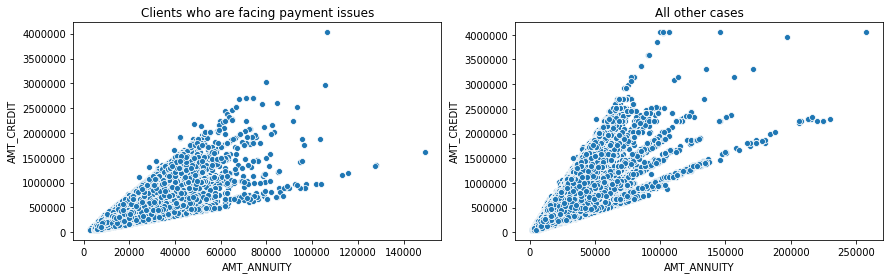

In [50]:
# Plotting AMT_ANNUITY vs AMT_CREDIT
plt.subplot(1,2,1)
sns.scatterplot(target_1.AMT_ANNUITY,target_1.AMT_CREDIT)
plt.title('Clients who are facing payment issues')
plt.subplot(1,2,2)
plt.subplots_adjust(right=2)
plt.title("All other cases")
sns.scatterplot(target_0.AMT_ANNUITY,target_0.AMT_CREDIT)

plt.show()

**Observation** : In both the cases we see that these is correlation between AMT_ANNUITY and AMT_CREDIT

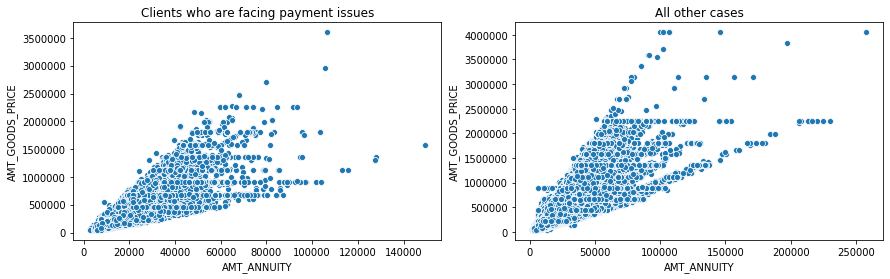

In [51]:
# Plotting AMT_ANNUITY vs AMT_GOODS_PRICE
plt.subplot(1,2,1)
sns.scatterplot(target_1.AMT_ANNUITY,target_1.AMT_GOODS_PRICE)
plt.title('Clients who are facing payment issues')
plt.subplot(1,2,2)
plt.subplots_adjust(right=2)
plt.title("All other cases")
sns.scatterplot(target_0.AMT_ANNUITY,target_0.AMT_GOODS_PRICE)

plt.show()

**Observation** : We see that most of data points fall under AMT_ANNUITY < 70000 and AMT_GOODS_PRICE < 2000000 for defaulting and for non defaulting clients data range is in  AMT_ANNUITY < 125000 and AMT_GOODS_PRICE < 2400000 

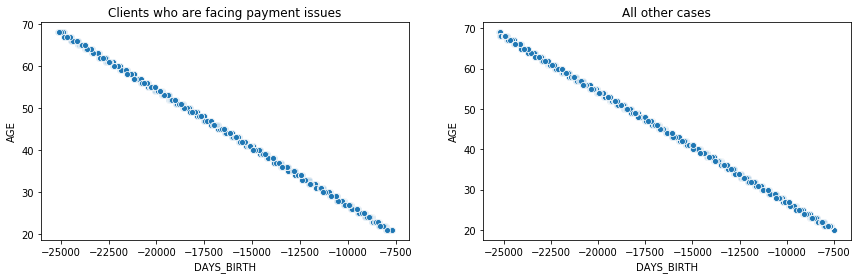

In [52]:
#Plotting DAYS_BIRTH and  AGE
plt.subplot(1,2,1)
sns.scatterplot(target_1.DAYS_BIRTH,target_1.AGE)
plt.title('Clients who are facing payment issues')
plt.subplot(1,2,2)
plt.subplots_adjust(right=2)
plt.title("All other cases")
sns.scatterplot(target_0.DAYS_BIRTH,target_0.AGE)

plt.show()

**Observation** : As Age is derived from negative DAYS_BIRTH column, these 2 features are very highly negatively correlated

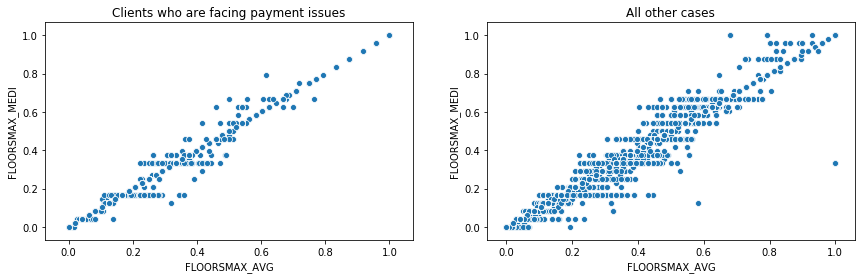

In [53]:
# plotting FLOORSMAX_AVG,FLOORSMAX_MODE ,FLOORSMAX_MEDI
plt.subplot(1,2,1)
sns.scatterplot(target_1.FLOORSMAX_AVG,target_1.FLOORSMAX_MEDI)
plt.title('Clients who are facing payment issues')
plt.subplot(1,2,2)
plt.subplots_adjust(right=2)
plt.title("All other cases")
sns.scatterplot(target_0.FLOORSMAX_AVG,target_0.FLOORSMAX_MEDI)

plt.show()

**Observation** : These 2 columns FLOORSMAX_AVG,FLOORSMAX_MEDI show very high correlation

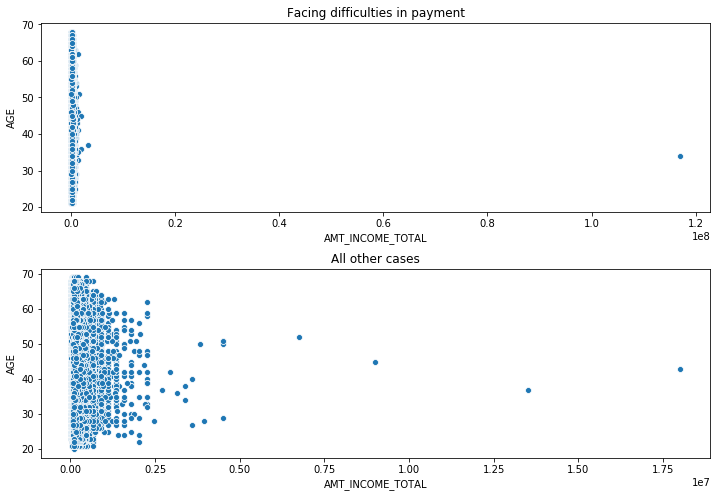

In [54]:
#Plotting AMT_INCOME_TOTAL  and  AGE
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.scatterplot(target_1.AMT_INCOME_TOTAL,target_1.AGE)
plt.title('Facing difficulties in payment')
plt.subplot(2,1,2)
plt.subplots_adjust(hspace=.3)
plt.title("All other cases")
sns.scatterplot(target_0.AMT_INCOME_TOTAL,target_0.AGE)
plt.show()

**Observation** : Age and AMT_INCOME_TOTAL has very less or no linear correlation

### Continuous variable - Categorical variable 

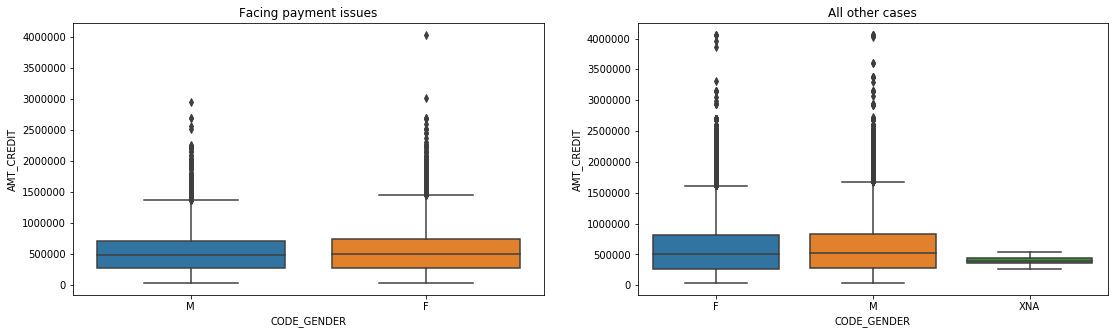

In [55]:
# Here plotting is done for clients with credit less than 10000000 due to outliers present are affecting the graph
plt.figure(figsize=(5,5))

plt.subplot(1,2,1)
sns.boxplot(x='CODE_GENDER',y='AMT_CREDIT',data=target_1[target_1.AMT_CREDIT<10000000])
plt.title('Facing payment issues')
plt.subplot(1,2,2)
plt.subplots_adjust(right=3)
plt.title("All other cases")
sns.boxplot(x='CODE_GENDER',y='AMT_CREDIT',data=target_0[target_0.AMT_CREDIT<10000000])
plt.show()

**Observation:** In both the cases , median for amount credit is same for both the genders but in all other cases we see that the 
variation is higher than client with payment difficulties.

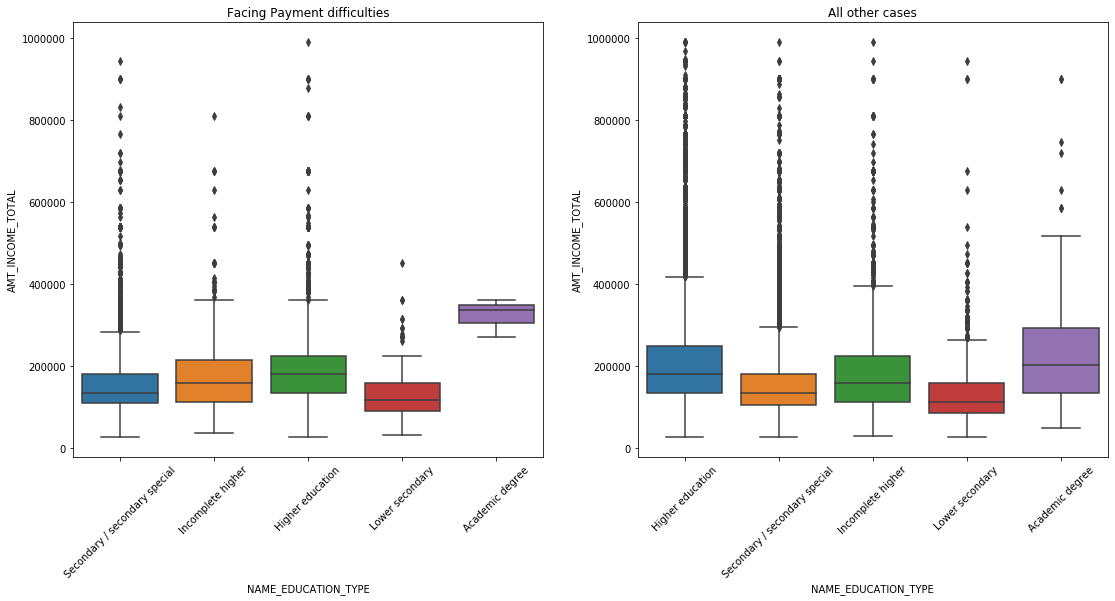

In [56]:
# Here plotting is done for clients with income less than 1000000 due to outliers present are affecting the graph
plt.figure(figsize=(5,8))

plt.subplot(1,2,1)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data=target_1[target_1.AMT_INCOME_TOTAL<1000000])
plt.title('Facing Payment difficulties')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.subplots_adjust(right=3)
plt.title("All other cases")
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data=target_0[target_0.AMT_INCOME_TOTAL<1000000])
plt.xticks(rotation=45)
plt.show()

**Observation:**
- Academic degree has a wider area range with amount income total in the case of "all other cases " compared to "Client facing payment difficulties"
- Secondary,Higher,Incomplete higher clients are having more outliers.

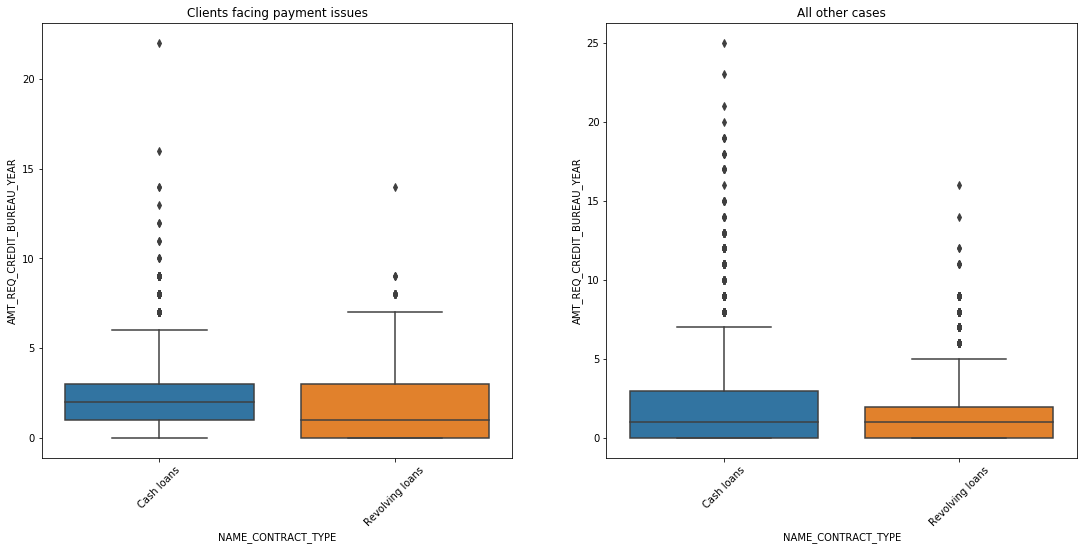

In [57]:
#plot for AMT_REQ_CREDIT_BUREAU_YEAR vs NAME_CONTRACT_TYPE
plt.figure(figsize=(5,8))

plt.subplot(1,2,1)
sns.boxplot(x='NAME_CONTRACT_TYPE',y='AMT_REQ_CREDIT_BUREAU_YEAR',data=target_1)
plt.title('Clients facing payment issues')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.subplots_adjust(right=3)
plt.title("All other cases")
sns.boxplot(x='NAME_CONTRACT_TYPE',y='AMT_REQ_CREDIT_BUREAU_YEAR',data=target_0)
plt.xticks(rotation=45)
plt.show()

**Observation:**
- In client facing difficulties, cash loan data has low S.D and revolving loans are having high S.D which is opposite in the all other cases.
- Outliers are less in case of client facing payment compared to others.

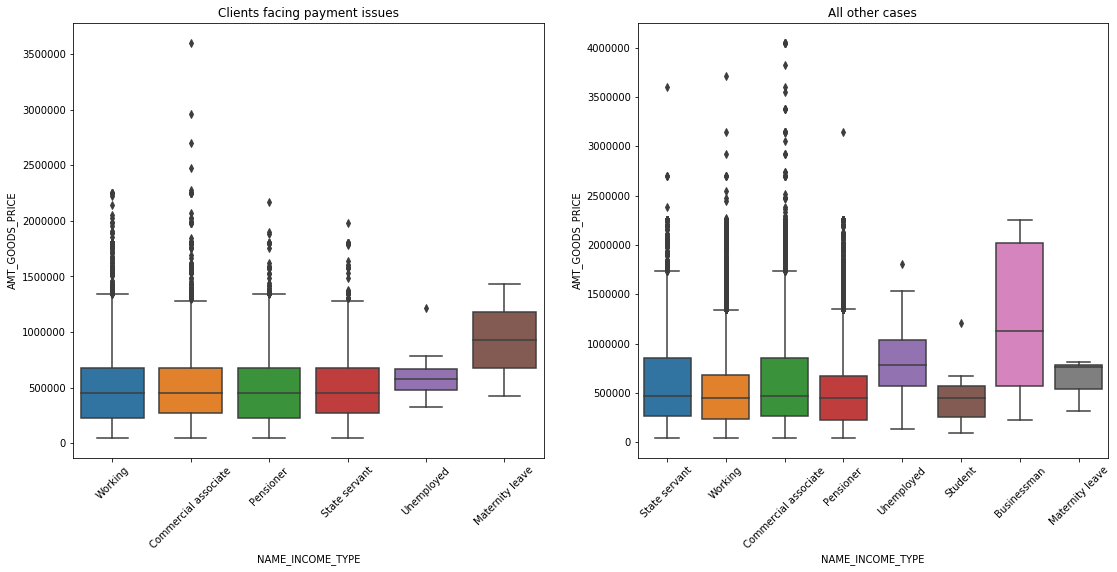

In [58]:
#plotting AMT_GOODS_PRICE vs NAME_INCOME_TYPE
plt.figure(figsize=(5,8))

plt.subplot(1,2,1)
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_GOODS_PRICE',data=target_1)
plt.title('Clients facing payment issues')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.subplots_adjust(right=3)
plt.title("All other cases")
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_GOODS_PRICE',data=target_0)
plt.xticks(rotation=45)
plt.show()

**Observation:**
- Businessmen are not facing payment difficulties.
- All other types of clients are having equal chances of facing payment difficulties.

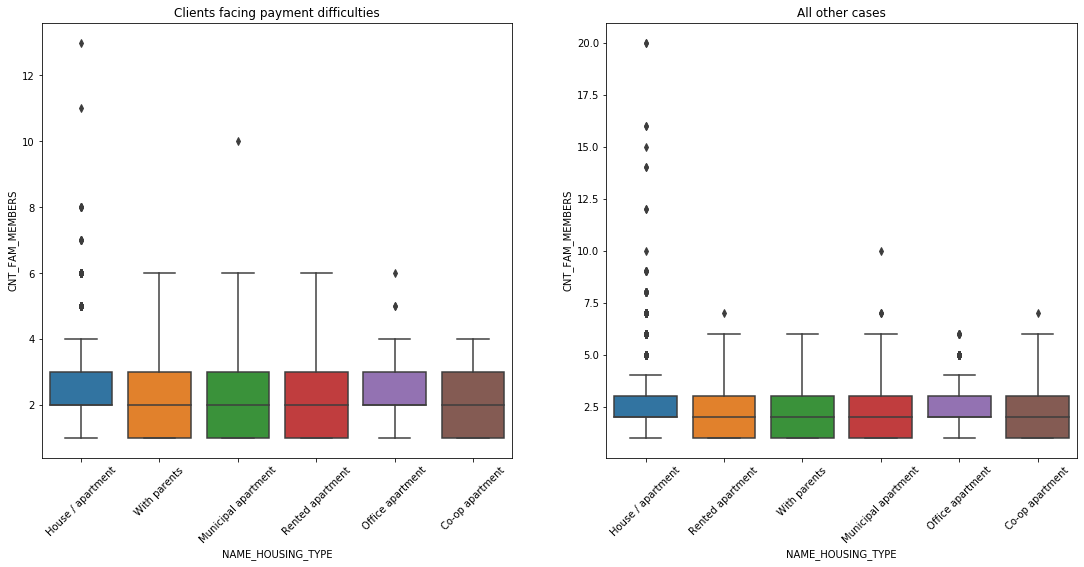

In [59]:
#plot for NAME_HOUSING_TYPE vs CNT_FAM_MEMBERS
plt.figure(figsize=(5,8))

plt.subplot(1,2,1)
sns.boxplot(x='NAME_HOUSING_TYPE',y='CNT_FAM_MEMBERS',data=target_1)
plt.title('Clients facing payment difficulties')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.subplots_adjust(right=3)
plt.title('All other cases')
sns.boxplot(x='NAME_HOUSING_TYPE',y='CNT_FAM_MEMBERS',data=target_0)
plt.xticks(rotation=45)
plt.show()

### Categorical vs Categorical

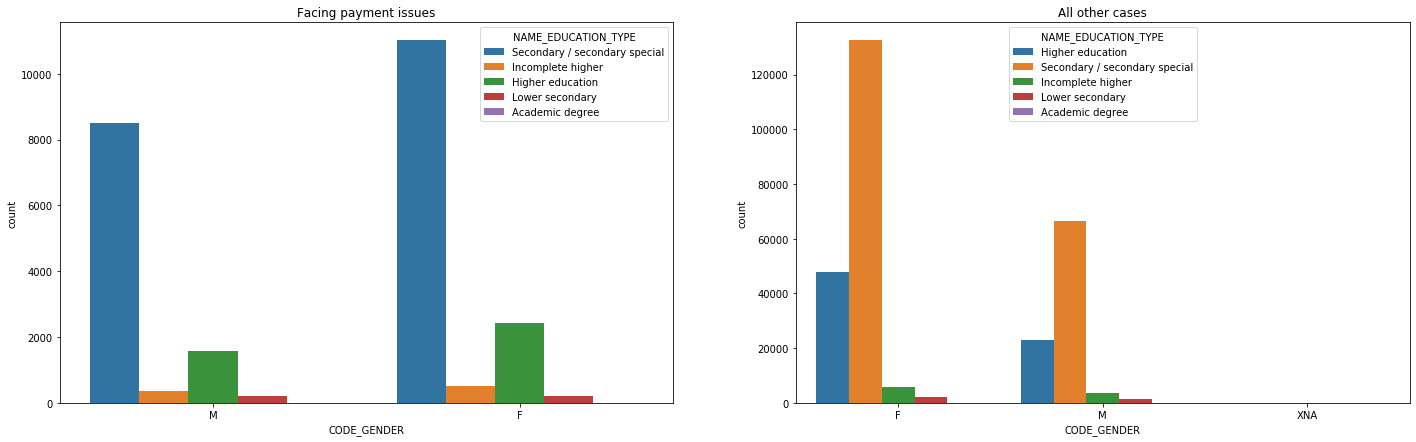

In [60]:
#plot for CODE_GENDER vs NAME_EDUCATION_TYPE

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(x = target_1.CODE_GENDER,hue=target_1.NAME_EDUCATION_TYPE)
plt.title('Facing payment issues')
plt.subplot(1,2,2)
sns.countplot(x =target_0.CODE_GENDER,hue=target_0.NAME_EDUCATION_TYPE)
plt.title('All other cases')
plt.subplots_adjust(right=2)
plt.show()

**Observation** : In both cases, most of the women are having highly educated than men

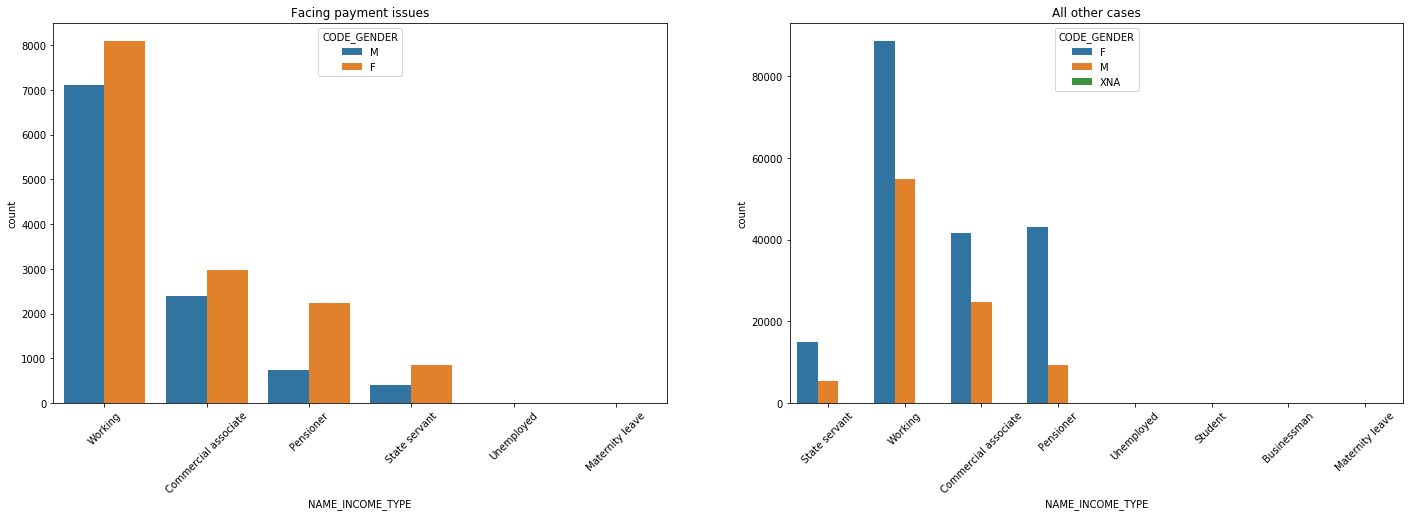

In [61]:
# plot for NAME_INCOME_TYPE vs CODE_GENDERt
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(x =target_1.NAME_INCOME_TYPE ,hue=target_1.CODE_GENDER)
plt.title('Facing payment issues')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(x =target_0.NAME_INCOME_TYPE,hue=target_0.CODE_GENDER)
plt.title('All other cases')
plt.subplots_adjust(right=2)
plt.xticks(rotation=45)
plt.show()

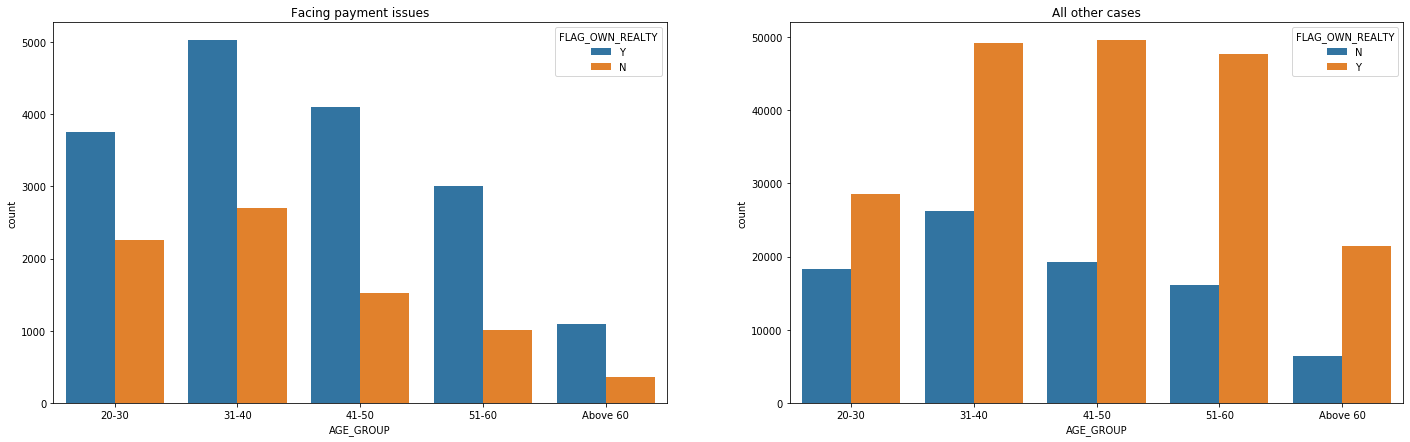

In [62]:
#plot for AGE_GROUP vs FLAG_OWN_REALTY
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(x = target_1.AGE_GROUP,hue=target_1.FLAG_OWN_REALTY)
plt.title('Facing payment issues')
plt.subplot(1,2,2)
sns.countplot(x =target_0.AGE_GROUP,hue=target_0.FLAG_OWN_REALTY)
plt.title('All other cases')
plt.subplots_adjust(right=2)
plt.show()

**Observation:** 
- Clients Under age group 20-30 , owning a realty flat are more likely to face payment issues.
- Clients in the age group 40 and above owning a realty are most likely not to face any payment issues.

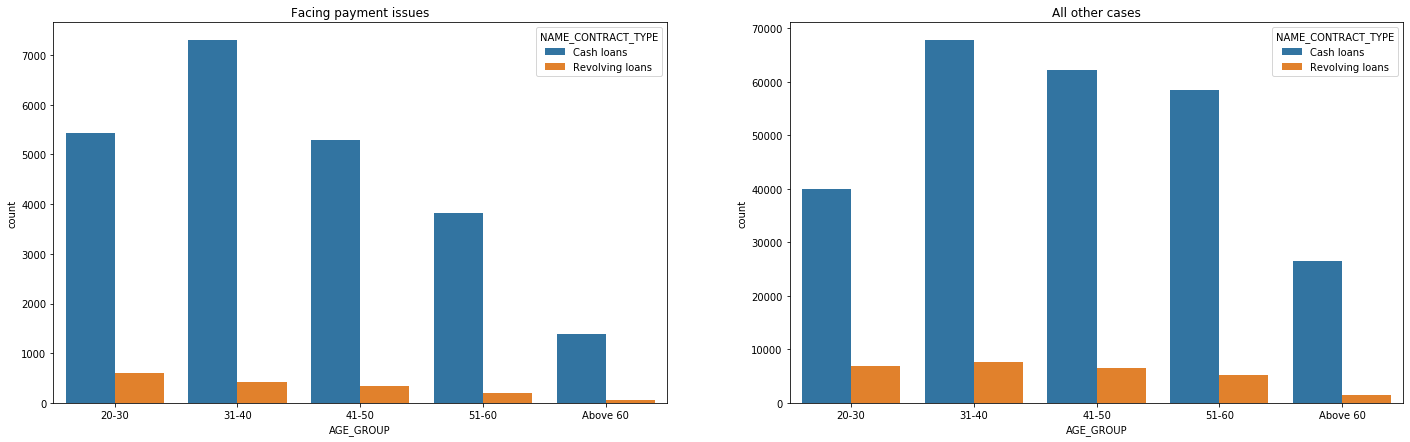

In [63]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(x = target_1.AGE_GROUP,hue=target_1.NAME_CONTRACT_TYPE)
plt.title('Facing payment issues')
plt.subplot(1,2,2)
sns.countplot(x =target_0.AGE_GROUP,hue=target_0.NAME_CONTRACT_TYPE)
plt.title('All other cases')
plt.subplots_adjust(right=2)
plt.show()

**Observation:** From both the graphs we can say that the client taking revolving loans have less probability of facing payment issues.

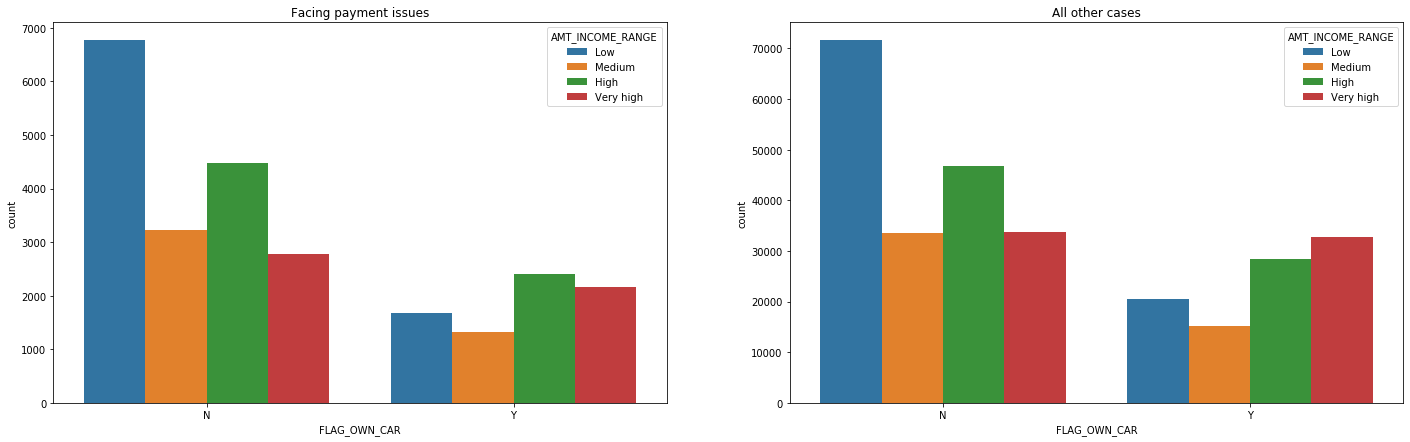

In [64]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(hue = target_1.AMT_INCOME_RANGE,x=target_1.FLAG_OWN_CAR)
plt.title('Facing payment issues')
plt.subplot(1,2,2)
sns.countplot(hue =target_0.AMT_INCOME_RANGE,x=target_0.FLAG_OWN_CAR)
plt.title('All other cases')
plt.subplots_adjust(right=2)
plt.show()

## Finding the highly correlated features in latest application dataset

In [65]:
latest_apps_corr = latest_apps.corr()

In [66]:
latest_apps_corr.TARGET.sort_values().head()

EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
AGE             -0.078234
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64

In [67]:
latest_apps_corr.TARGET.sort_values().tail()

DAYS_REGISTRATION         0.041975
DAYS_ID_PUBLISH           0.051457
DAYS_LAST_PHONE_CHANGE    0.055218
DAYS_BIRTH                0.078239
TARGET                    1.000000
Name: TARGET, dtype: float64

From the above analysis we can say that out of all the numeric variables provided
- EXT_SOURCE_3 
- EXT_SOURCE_2 
- AGE          
- DAYS_EMPLOYED
- FLOORSMAX_AVG

shows highly negative correlation and
- DAYS_REGISTRATION     
- DAYS_ID_PUBLISH       
- DAYS_LAST_PHONE_CHANGE
- DAYS_BIRTH            
these variables show positive correlation with TARGET variable(i.e., can be used for predicting if client defaults or not)            

### Combining 2 given datasets to get further insights

In the previous applications we have 37 columns. We have already analysed how different features of current application are influencing target feature. Now we will merge all the columns in current application with all other variables in previous application, so that we can analyse all variables in previous application that are influencing Target variable.

In [68]:
previous_apps.shape

(1670214, 37)

In [69]:
# Removing the column values of 'XNA' and 'XAP' as we don't get any insights from these values
previous_apps=previous_apps.drop(previous_apps[previous_apps['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_apps=previous_apps.drop(previous_apps[previous_apps['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

previous_apps.shape

(69635, 37)

In [70]:
# merging 2 dataframes based on SK_ID_CURR column which is present in both Dataframes
merged_data = pd.merge(latest_apps,previous_apps,how ='inner', on="SK_ID_CURR")

In [71]:
merged_data.shape

(59413, 120)

In [72]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,AMT_INCOME_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.9831,0.3333,0.9831,0.3333,0.9831,0.3333,0.1227,No,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,28,20-30,Low,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.9697,0.0417,0.9697,0.0417,0.9697,0.0417,0.0117,No,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,41,41-50,Very high,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

### Checking the missing data percentage in the merged dataframe

In [73]:
merged_missing_data  = pd.DataFrame(columns=['Column','Type','Missing_count','Missing_percentage'])
for i in merged_data.columns:
    null_count = merged_data[i].isna().sum()
    null_perc  = null_count/len(merged_data)*100
    if null_count != 0:
        df2={'Column':i
             ,'Type': merged_data[i].dtype
             ,'Missing_count': null_count
             ,'Missing_percentage' : null_perc
            }
        merged_missing_data = merged_missing_data.append(df2,ignore_index=True)


In [74]:
merged_missing_data.sort_values(by = 'Missing_percentage',ascending=False)

,Column,Type,Missing_count,Missing_percentage
27,RATE_INTEREST_PRIMARY,float64,59413,100.000000
28,RATE_INTEREST_PRIVILEGED,float64,59413,100.000000
25,AMT_DOWN_PAYMENT,float64,53239,89.608335
26,RATE_DOWN_PAYMENT,float64,53239,89.608335
33,DAYS_LAST_DUE_1ST_VERSION,float64,38271,64.415195
31,DAYS_FIRST_DRAWING,float64,38271,64.415195
32,DAYS_FIRST_DUE,float64,38271,64.415195
36,NFLAG_INSURED_ON_APPROVAL,float64,38271,64.415195
34,DAYS_LAST_DUE,float64,38271,64.415195
35,DAYS_TERMINATION,float64,38271,64.415195


In [75]:
#Dropping all the columns with the missing percentage greater than 50
for i in merged_missing_data[merged_missing_data.Missing_percentage>50].Column:
    merged_data.drop(columns=i,axis =1,inplace=True)

In [76]:
merged_data.shape

(59413, 110)

In [77]:
merged_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 110 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_x                  float64 
 9   AMT_ANNUITY_x                 float64 
 10  AMT_GOODS_PRICE_x             float64 
 11  NAME_TYPE_SUITE_x             object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int64   
 18  DAYS_

### Univariate Analysis for previous application dataframe

#### Univariate Analysis for Continuous variable

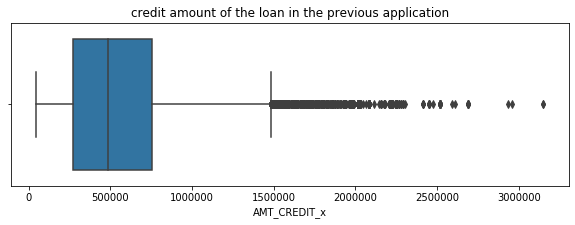

In [78]:
# plot for AMT_CREDIT 
plt.figure(figsize=(10,3))
plt.title("credit amount of the loan in the previous application")
sns.boxplot(merged_data.AMT_CREDIT_x)
plt.show()

**Observation** : Here we see that there are lot of outliers in AMT_CREDIT column

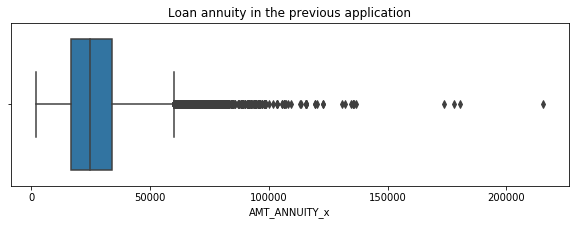

In [79]:
#plot for AMT_ANNUITY
plt.figure(figsize=(10,3))
plt.title("Loan annuity in the previous application")
sns.boxplot(merged_data.AMT_ANNUITY_x)
plt.show()

**Observation** : Here we see that even for AMT_ANNUITY column there are lot of outliers .

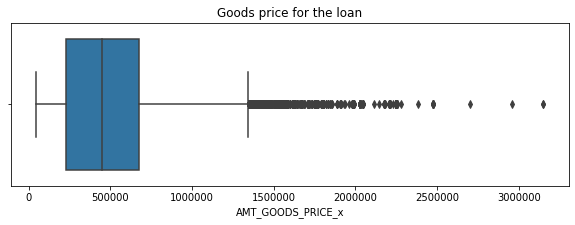

In [80]:
#plot for AMT_GOODS_PRICE
plt.figure(figsize=(10,3))
plt.title("Goods price for the loan")
sns.boxplot(merged_data.AMT_GOODS_PRICE_x)
plt.show()

**Observation** : Here we see that even for AMT_GOODS_PRICE column there are lot of outliers .

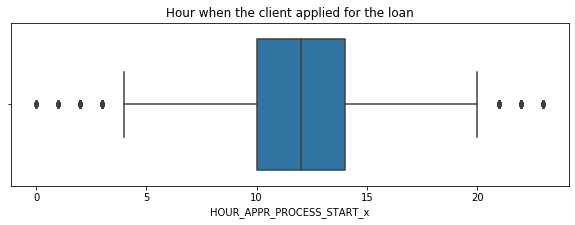

In [81]:
# Plotting HOUR_APPR_PROCESS_START
plt.figure(figsize=(10,3))
plt.title("Hour when the client applied for the loan")
sns.boxplot(merged_data.HOUR_APPR_PROCESS_START_x)
plt.show()

**Observation** : Most of the data lies in IQR and only a few outliers on either sides of IQR.

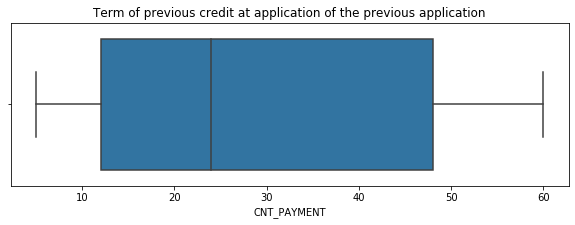

In [82]:
# Plot for CNT_PAYMENT
plt.figure(figsize=(10,3))
plt.title("Term of previous credit at application of the previous application")
sns.boxplot(merged_data.CNT_PAYMENT)
plt.show()

**Observation**: Most of the data lies in IQR and only afew outliers .

#### Univariate analaysis for Categorical Variable


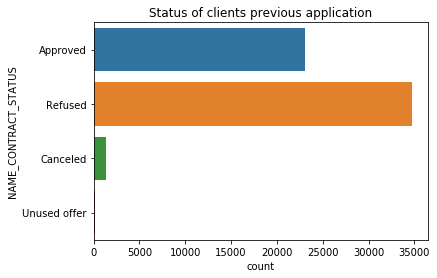

In [83]:
#plot for NAME_CONTRACT_STATUS
sns.countplot(y=merged_data.NAME_CONTRACT_STATUS)
plt.title('Status of clients previous application')
plt.show()

**Observation**: Lot of the clients have their previous applications refused.

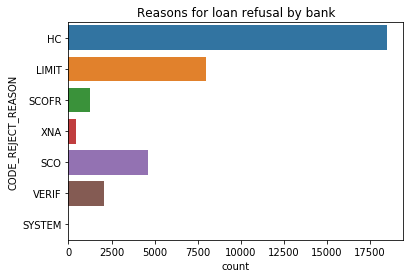

In [84]:
#plot for CODE_REJECT_REASON when the contract status for the client is "Refused"
sns.countplot(y=merged_data.CODE_REJECT_REASON[merged_data.NAME_CONTRACT_STATUS=='Refused'])
plt.title('Reasons for loan refusal by bank')
plt.show()

**Observation**:HC is the primary reasaon why bank is refusing clients loan

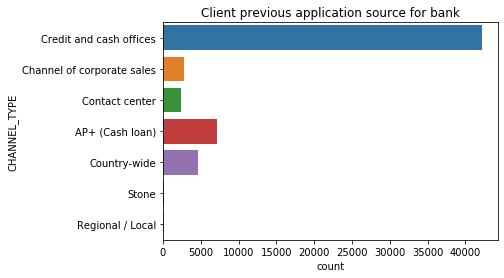

In [86]:
#plot for CHANNEL_TYPE
sns.countplot(y=merged_data.CHANNEL_TYPE)
plt.title('Client previous application source for bank')
plt.show()

**Observation:** Credit and cash offices are the major channels for clients previous application for loan.

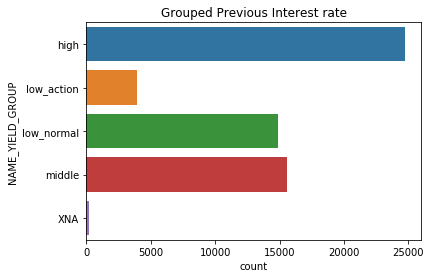

In [87]:
#Plotting NAME_YIELD_GROUP
sns.countplot(y=merged_data.NAME_YIELD_GROUP)
plt.title('Grouped Previous Interest rate')
plt.show()

**Observation:**: From the above chart, we can infer that the grouped previous interest rate is in the following order.
- high > middle > low_normal > low_action

## Multivariate analysis for merged dataframe

#### Multivariate analysis for continuous-continuous variable

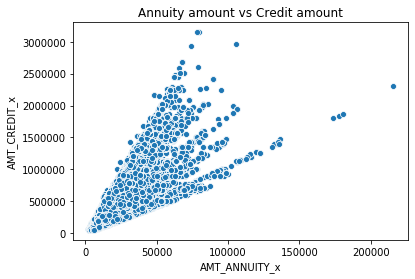

In [88]:
# Plotting for AMT_ANNUITY vs AMT_CREDIT                   
plt.title("Annuity amount vs Credit amount")
sns.scatterplot(merged_data.AMT_ANNUITY_x,merged_data.AMT_CREDIT_x)
plt.show()

**Observation:** The two entities amt_annuity and amt_credit are linearly correlated.

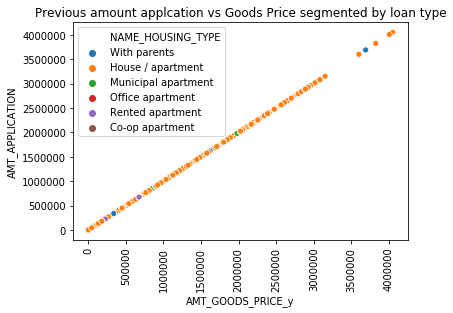

In [89]:
# Plotting for AMT_GOODS_PRICE vs AMT_APPLICATION
plt.title("Previous amount applcation vs Goods Price segmented by loan type")
plt.xticks(rotation=90)
sns.scatterplot(merged_data.AMT_GOODS_PRICE_y,merged_data.AMT_APPLICATION,hue=merged_data.NAME_HOUSING_TYPE)
plt.show()

**Observation:** 
- we can see that for cash loans and consumer loans, amount application and amount goods price are strictly linearly correlated.

#### Multivariate analysis for continuous-categorical variable

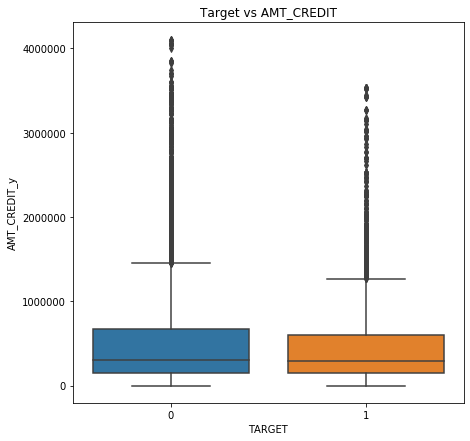

In [90]:
#plotting CHANNEL_TYPE vs AMT_CREDIT
plt.figure(figsize=(7,7))
sns.boxplot(x='TARGET',y='AMT_CREDIT_y',data=merged_data)
plt.title('Target vs AMT_CREDIT')
plt.show()

**Observation:**
- Both client with difficulties and all other cases are having asame amount credit range.

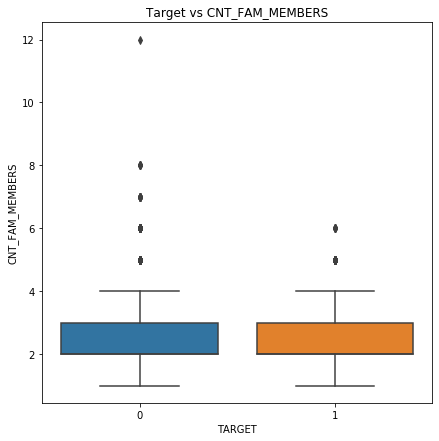

In [91]:
#plotting TARGET vs AMT_GOODS_PRICE
plt.figure(figsize=(7,7))
sns.boxplot(x='TARGET',y='CNT_FAM_MEMBERS',data=merged_data)
plt.title('Target vs CNT_FAM_MEMBERS')
plt.show()

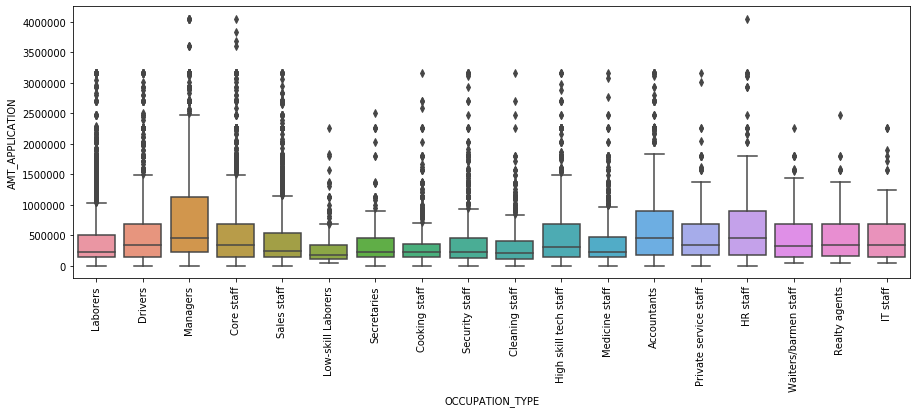

In [92]:
#plotting OCCUPATION_TYPE vs AMT_APPLICATION
plt.figure(figsize=(15,5))
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_APPLICATION',data=merged_data)
plt.xticks(rotation='90')
plt.show()

**Observation:**
-  Managers have requested for a loan amount of more than 10Lacs followed by accounts.
-  Low-skilled labourers and cooking staff have requested for very low amount of loan in their previous applications.

#### Multivariate analysis for categorical-categorical variable

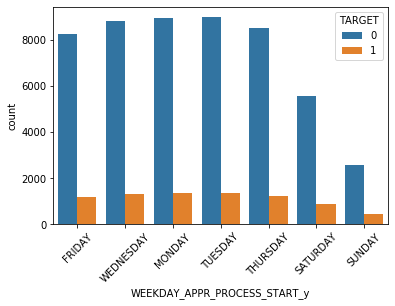

In [93]:
# Plotting for WEEKDAY_APPR_PROCESS_START vs TARGET
sns.countplot(x =merged_data.WEEKDAY_APPR_PROCESS_START_y, hue=merged_data.TARGET)
plt.xticks(rotation=45)
plt.show()

**Observation:** Compared to weekends, most of the people are starting application process on weekdays.

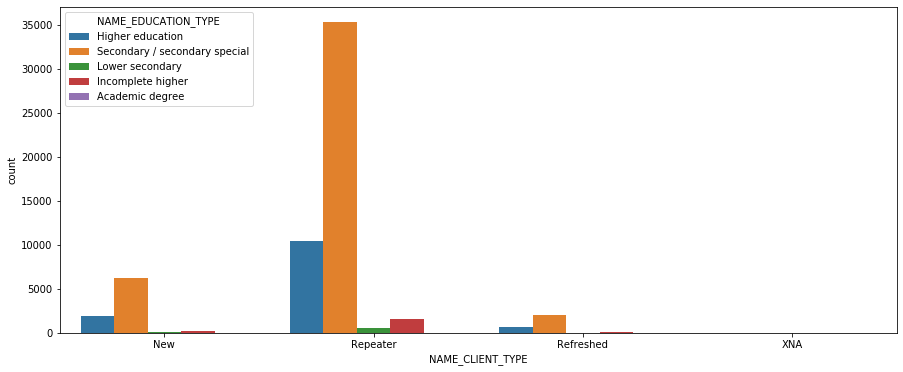

In [94]:
#plotting NAME_EDUCATION_TYPE vs NAME_CLIENT_TYPE
plt.figure(figsize=(15,6))
sns.countplot(data = merged_data,hue='NAME_EDUCATION_TYPE',x='NAME_CLIENT_TYPE')
plt.show()

**Observation:** From the above graph, clients with secondary education are more likely to return to the bank for applying loan followed by New clients.

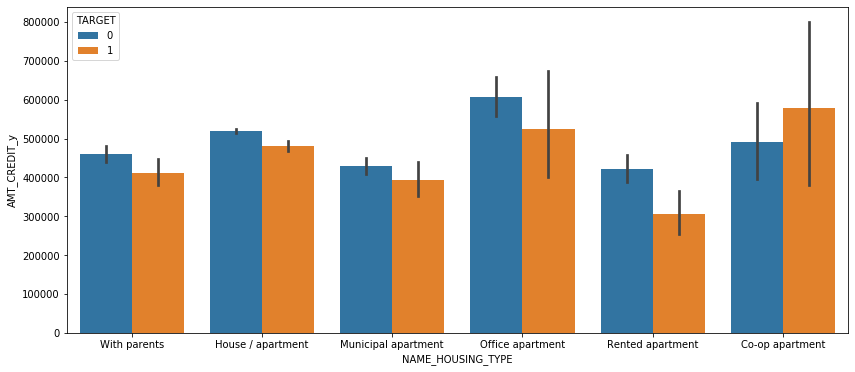

In [95]:
#plotting AMT_CREDIT vs NAME_HOUSING_TYPE
plt.figure(figsize=(14,6))
sns.barplot(data = merged_data, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.show()

**Observations:**
- Clients living in Co-op apartment have high chance of having payment difficulties compared to people living in other housing types.

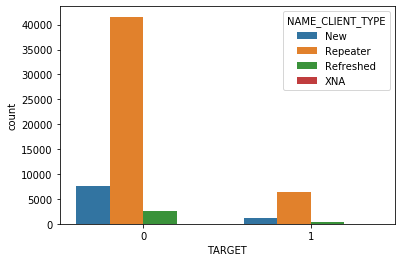

In [96]:
sns.countplot(x =merged_data.TARGET,hue=merged_data.NAME_CLIENT_TYPE)
plt.show()

**Observation:** From the above graph, we can infer that the repeating clients are less likely to face payment difficulties compared to others.

### Results from the case study

- As the clients age increases the tendency to face payment issues drops significantly. Hence banks can prefer to choose clients with age above 45 years to make a good business.
- External sources have shown a good correlation with target variable. So while approving to a client, banks can verify the clients external source score and make the decision.
- Clients with secondary education are more likely to return to the bank for applying loan.
- Banks can approach the client who are Businessmen as they are likely to repay the loan and should not reconsider other while approving other income type.
- Clients living in Co-op apartment have high chance of having payment difficulties compared to people living in other housing types.